# Analysis on Spendings.

In [50]:
import pandas as pd
import numpy as np
import statistics
from matplotlib import pyplot as plt
import scipy.stats as stats
from datetime import datetime


In [51]:
data = pd.read_excel("C:\\Users\\Emre Sevinç\\Fundamentals of Data Science\\Data Case Project\\spendings_final.xlsx",header=0)

#df_o = pd.DataFrame(data)
data

,Date,Place,Description,Category,Amount
0,2024-02-18,Exchange,Exchange - 100€,Income,193.0
1,2024-02-18,Panna Cotta,Polito Salad,Dinner,9.0
2,2024-02-19,Dormitory,Laundry Ticket,Home Expenses,5.0
3,2024-02-19,Sun-Light,GYM Membership,Personal Care,39.0
4,2024-02-19,IChicken,Combo Menu,Dinner,8.0
...,...,...,...,...,...
202,2024-05-02,Bingo,Ice Cream,Groceries,0.5
203,2024-05-03,Riva,Tuna Salate,Dinner,7.0
204,2024-05-03,Bingo,Pringles,Groceries,3.9
205,2024-05-03,Bingo,Grapes,Groceries,3.9


## Cleaning and Fixing the Data Set

In [52]:
data["Description"] = data["Description"].str.strip()
data["Place"] = data["Place"].str.strip()
data["Description"] = data["Description"].replace("Pizza Cappicaoso","Pizza")
data["Description"] = data["Description"].replace("Mercator","Market")
data["Description"] = data["Description"].replace("Kiseljak","Mineral Water")

data = data[data["Category"] != "Cash Transactions"]

In [53]:
data = data[data["Category"] != "Income"]#I don't need this
#data.loc[data['Category'] != 'Income', 'Amount'] *= -1
data

,Date,Place,Description,Category,Amount
1,2024-02-18,Panna Cotta,Polito Salad,Dinner,9.0
2,2024-02-19,Dormitory,Laundry Ticket,Home Expenses,5.0
3,2024-02-19,Sun-Light,GYM Membership,Personal Care,39.0
4,2024-02-19,IChicken,Combo Menu,Dinner,8.0
5,2024-02-19,Buffet,SIM Card + 10GB,Home Expenses,10.0
...,...,...,...,...,...
202,2024-05-02,Bingo,Ice Cream,Groceries,0.5
203,2024-05-03,Riva,Tuna Salate,Dinner,7.0
204,2024-05-03,Bingo,Pringles,Groceries,3.9
205,2024-05-03,Bingo,Grapes,Groceries,3.9


## Checking the data types

In [54]:
data.dtypes

Date           datetime64[ns]
Place                  object
Description            object
Category               object
Amount                float64
dtype: object

## Checking the if there is any null data.

In [55]:
data.isnull().sum()

Date           0
Place          0
Description    0
Category       0
Amount         0
dtype: int64

## The count of every unique entry for each column.

In [56]:
df = data
len(df["Date"].unique())

63

In [57]:
len(df["Place"].unique())

29

In [58]:
len(df["Description"].unique())

72

In [59]:
len(df["Category"].unique())

7

In [60]:
len(df["Amount"].unique())

62

## Exploring Outliers

For the column named "Amount" the data cannot be a outlier. But if we group the similar entries from other columns. Then we can say if there might be a outlier or not.

In [61]:
# for "Description" column
group_description = df.groupby(df["Description"])
#pd.set_option('display.max_rows', None)

exp = group_description.describe()
exp

Date                                            \
                            count                 mean                  min   
Description                                                                   
Apple                           2  2024-05-01 00:00:00  2024-04-29 00:00:00   
Apple Juice                     4  2024-04-11 12:00:00  2024-02-28 00:00:00   
Ayran                           2  2024-03-17 00:00:00  2024-03-10 00:00:00   
Banana                          3  2024-03-19 00:00:00  2024-02-24 00:00:00   
Bombacia                        1  2024-03-05 00:00:00  2024-03-05 00:00:00   
...                           ...                  ...                  ...   
Tople Oreo Chokolade Deluxe     1  2024-03-02 00:00:00  2024-03-02 00:00:00   
Tuna Salate                     2  2024-05-01 00:00:00  2024-04-29 00:00:00   
WOK-Piletina                    2  2024-04-10 00:00:00  2024-04-07 00:00:00   
Wafer                           3  2024-03-29 00:00:00  2024-03-24 00:00:00   
Water                           3  2024-03-03 08:00:00  2024-02-24 00:00:00   

                                                                       \
                                             25%                  50%   
Description                                                             
Apple                        2024-04-30 00:00:00  2024-05-01 00:00:00   
Apple Juice                  2024-04-10 00:00:00  2024-04-25 00:00:00   
Ayran                        2024-03-13 12:00:00  2024-03-17 00:00:00   
Banana                       2024-02-27 12:00:00  2024-03-02 00:00:00   
Bombacia                     2024-03-05 00:00:00  2024-03-05 00:00:00   
...                                          ...                  ...   
Tople Oreo Chokolade Deluxe  2024-03-02 00:00:00  2024-03-02 00:00:00   
Tuna Salate                  2024-04-30 00:00:00  2024-05-01 00:00:00   
WOK-Piletina                 2024-04-08 12:00:00  2024-04-10 00:00:00   
Wafer                        2024-03-24 12:00:00  2024-03-25 00:00:00   
Water                        2024-02-27 12:00:00  2024-03-02 00:00:00   

                                                                            \
                                             75%                  max  std   
Description                                                                  
Apple                        2024-05-02 00:00:00  2024-05-03 00:00:00  NaN   
Apple Juice                  2024-04-26 12:00:00  2024-04-28 00:00:00  NaN   
Ayran                        2024-03-20 12:00:00  2024-03-24 00:00:00  NaN   
Banana                       2024-03-31 00:00:00  2024-04-29 00:00:00  NaN   
Bombacia                     2024-03-05 00:00:00  2024-03-05 00:00:00  NaN   
...                                          ...                  ...  ...   
Tople Oreo Chokolade Deluxe  2024-03-02 00:00:00  2024-03-02 00:00:00  NaN   
Tuna Salate                  2024-05-02 00:00:00  2024-05-03 00:00:00  NaN   
WOK-Piletina                 2024-04-11 12:00:00  2024-04-13 00:00:00  NaN   
Wafer                        2024-03-31 12:00:00  2024-04-07 00:00:00  NaN   
Water                        2024-03-07 12:00:00  2024-03-13 00:00:00  NaN   

                            Amount                                         \
                             count      mean   min     25%    50%     75%   
Description                                                                 
Apple                          2.0  1.105000  1.00  1.0525  1.105  1.1575   
Apple Juice                    4.0  1.925000  1.60  1.6000  1.600  1.9250   
Ayran                          2.0  1.275000  1.05  1.1625  1.275  1.3875   
Banana                         3.0  2.370000  1.21  1.8550  2.500  2.9500   
Bombacia                       1.0  0.600000  0.60  0.6000  0.600  0.6000   
...                            ...       ...   ...     ...    ...     ...   
Tople Oreo Chokolade Deluxe    1.0  5.000000  5.00  5.0000  5.000  5.0000   
Tuna Salate                    2.0  

In [62]:
# for "Description" column
group_place = df.groupby(df["Place"])

group_place.describe()

Date                                                      \
                  count                           mean                  min   
Place                                                                         
Amko                  6            2024-03-09 12:00:00  2024-02-24 00:00:00   
Automat              12            2024-03-24 00:00:00  2024-02-26 00:00:00   
Bascarsija            1            2024-03-02 00:00:00  2024-03-02 00:00:00   
Bingo                23            2024-04-11 00:00:00  2024-03-02 00:00:00   
Buffet                4            2024-02-29 18:00:00  2024-02-19 00:00:00   
Cipelici & Orange     1            2024-02-20 00:00:00  2024-02-20 00:00:00   
City View             2            2024-03-16 00:00:00  2024-03-02 00:00:00   
Crvena Jabuka         4            2024-04-17 12:00:00  2024-04-06 00:00:00   
Dining Hall           2            2024-02-27 00:00:00  2024-02-21 00:00:00   
Dormitory             6            2024-03-30 00:00:00  2024-02-19 00:00:00   
Fast-Food Hary       10            2024-03-19 21:36:00  2024-02-27 00:00:00   
Fresh                 2            2024-03-10 00:00:00  2024-03-10 00:00:00   
Hypermarket           1            2024-03-28 00:00:00  2024-03-28 00:00:00   
IChicken              3            2024-02-23 16:00:00  2024-02-19 00:00:00   
Ilica                 2            2024-03-03 00:00:00  2024-03-03 00:00:00   
Jumbo                 2            2024-03-16 00:00:00  2024-03-16 00:00:00   
Konzum               19  2024-04-01 01:15:47.368421120  2024-02-22 00:00:00   
LC Waikiki            1            2024-05-02 00:00:00  2024-05-02 00:00:00   
Market Nasco          2            2024-04-03 00:00:00  2024-03-24 00:00:00   
Mercator             11  2024-03-11 17:27:16.363636480  2024-02-24 00:00:00   
Montana               1            2024-03-30 00:00:00  2024-03-30 00:00:00   
Panna Cotta           2            2024-02-21 00:00:00  2024-02-18 00:00:00   
Pannera              28  2024-03-27 00:51:25.714285824  2024-02-25 00:00:00   
Pekara                9            2024-04-01 18:40:00  2024-02-27 00:00:00   
Pizza Station         1            2024-03-18 00:00:00  2024-03-18 00:00:00   
Riva                 24            2024-03-28 03:00:00  2024-03-07 00:00:00   
Sun-Light             2            2024-03-20 12:00:00  2024-02-19 00:00:00   
Unknown               7  2024-03-25 06:51:25.714285824  2024-02-19 00:00:00   
Zeks                  4            2024-02-25 12:00:00  2024-02-20 00:00:00   

                                                             \
                                   25%                  50%   
Place                                                         
Amko               2024-02-28 18:00:00  2024-03-05 12:00:00   
Automat            2024-03-07 00:00:00  2024-03-30 00:00:00   
Bascarsija         2024-03-02 00:00:00  2024-03-02 00:00:00   
Bingo              2024-03-25 00:00:00  2024-04-09 00:00:00   
Buffet             2024-02-22 00:00:00  2024-02-28 12:00:00   
Cipelici & Orange  2024-02-20 00:00:00  2024-02-20 00:00:00   
City View          2024-03-09 00:00:00  2024-03-16 00:00:00   
Crvena Jabuka      2024-04-09 18:00:00  2024-04-16 00:00:00   
Dining Hall        2024-02-24 00:00:00  2024-02-27 00:00:00   
Dormitory          2024-03-18 18:00:00  2024-04-02 00:00:00   
Fast-Food Hary     2024-02-29 00:00:00  2024-03-03 00:00:00   
Fresh              2024-03-10 00:00:00  2024-03-10 00:00:00   
Hypermarket        2024-03-28 00:00:00  2024-03-28 00:00:00   
IChicken           2024-02-21 00:00:00  2024-02-23 00:00:00   
Ilica              2024-03-03 00:00:00  2024-03-03 00:00:00   
Jumbo              2024-03-16 00:00:00  2024-03-16 00:00:00   
Konzum             2024-03-03 12:00:00  2024-04-24 00:00:00   
LC Waikiki         2024-05-02 00:00:00  2024-05-02 00:00:00   
Market Nasco       2024-03-29 00:00:00  2024-04-03 00:00:00   
Mercator           2024-02-29 00:00:00  2024-03-05 00:00:00   
Montana            2024-03-30 00:00:00  2

In [63]:
group_hamburger = group_description.get_group("Hamburger")
df_hamburger = pd.DataFrame(group_hamburger)

df_hamburger

,Date,Place,Description,Category,Amount
20,2024-02-25,Pannera,Hamburger,Dinner,4.0
21,2024-02-25,Pannera,Hamburger,Dinner,4.0
32,2024-02-28,Fast-Food Hary,Hamburger,Dinner,5.0
35,2024-03-01,Pannera,Hamburger,Dinner,4.0
36,2024-03-01,Pannera,Hamburger,Dinner,4.0
42,2024-03-03,Fast-Food Hary,Hamburger,Dinner,5.0
62,2024-03-07,Riva,Hamburger,Dinner,5.0
76,2024-03-12,Riva,Hamburger,Dinner,5.0
77,2024-03-12,Riva,Hamburger,Dinner,5.0
91,2024-03-18,Pizza Station,Hamburger,Dinner,11.5


In [64]:
# finding outliers for data hamburger

q1 = df_hamburger["Amount"].quantile(0.25)
q2 = df_hamburger["Amount"].quantile(0.75)

qr = q2-q1

outlier_th = q2+1.5*qr
# if it was negative q2-1.5*qr

outlier = df_hamburger[df_hamburger["Amount"]>outlier_th]
print("Possible Outliers")
print(outlier)

Possible Outliers
          Date          Place Description Category  Amount
91  2024-03-18  Pizza Station   Hamburger   Dinner    11.5
125 2024-03-31        Pannera   Hamburger   Dinner     8.0
126 2024-03-31        Pannera   Hamburger   Dinner     8.0


In [65]:
#defining a function to use it

def find_outliers(data_frame,column_name,groupby_name):
    
    group_description = data_frame.groupby(data_frame[column_name])
    #preparing the data group
    group_entry = group_description.get_group(groupby_name)
    df_outlier = pd.DataFrame(group_entry)

    # method for finding outliers
    q1 = df_outlier["Amount"].quantile(0.25)
    q2 = df_outlier["Amount"].quantile(0.75)

    qr = q2-q1

    outlier_threshold = q2+1.5*qr

    
    outlier = df_outlier[df_outlier["Amount"] > outlier_threshold]
    if len(outlier) > 0 :
        print("Possible Outliers (High Expenses)")
        print(outlier)
    else:
        print("Couldn't find any outliers. Which means there is not any high expense!")
  

In [66]:
find_outliers(df,"Description","Hot-Dog")

Couldn't find any outliers. Which means there is not any high expense!


In [67]:
#find_outliers(df,"Description","Exchange - 100€")
# as can seen here it does not work for income datas.
#removed

In [68]:
find_outliers(df,"Description","Dankek Bites")

Couldn't find any outliers. Which means there is not any high expense!


In [69]:
find_outliers(df,"Description","Food")

Possible Outliers (High Expenses)
          Date          Place Description Category  Amount
152 2024-04-11  Crvena Jabuka        Food   Dinner    17.0


In [70]:
find_outliers(df,"Description","Sensation")

Possible Outliers (High Expenses)
         Date Place Description Category  Amount
63 2024-03-07  Riva   Sensation   Dinner     3.0


In [71]:
find_outliers(df,"Description","Market")

Possible Outliers (High Expenses)
          Date     Place Description   Category  Amount
156 2024-04-12  Mercator      Market  Groceries   21.75


#### now for "Place" column

In [72]:
find_outliers(df,"Place","Riva")

Couldn't find any outliers. Which means there is not any high expense!


In [73]:
find_outliers(df,"Place","Bingo")

Possible Outliers (High Expenses)
          Date  Place Description   Category  Amount
116 2024-03-28  Bingo      Market  Groceries    9.75
148 2024-04-08  Bingo      Market  Groceries   10.00
150 2024-04-09  Bingo      Market  Groceries   10.00
197 2024-04-30  Bingo      Market  Groceries    8.95


In [74]:
find_outliers(df,"Place","Crvena Jabuka")

Possible Outliers (High Expenses)
          Date          Place Description Category  Amount
152 2024-04-11  Crvena Jabuka        Food   Dinner    17.0


In [75]:
# Current thought on function find_outliers() - looks great! 

## Group by Categories

In [76]:
group_category = df.groupby(df["Category"])
group_category.describe()

Date                                                      \
               count                           mean                  min   
Category                                                                   
Dinner           109  2024-03-25 14:18:42.935779840  2024-02-18 00:00:00   
Discrepancy        7  2024-03-25 06:51:25.714285824  2024-02-19 00:00:00   
Entertainment      2            2024-03-20 12:00:00  2024-03-16 00:00:00   
Groceries         56            2024-03-25 18:00:00  2024-02-22 00:00:00   
Home Expenses     12            2024-03-21 14:00:00  2024-02-19 00:00:00   
Personal Care      4            2024-03-23 18:00:00  2024-02-19 00:00:00   
Transportation     2            2024-03-03 00:00:00  2024-03-03 00:00:00   

                                                                               \
                                25%                  50%                  75%   
Category                                                                        
Dinner          2024-03-05 00:00:00  2024-03-25 00:00:00  2024-04-11 00:00:00   
Discrepancy     2024-03-06 12:00:00  2024-03-30 00:00:00  2024-04-13 00:00:00   
Entertainment   2024-03-18 06:00:00  2024-03-20 12:00:00  2024-03-22 18:00:00   
Groceries       2024-03-03 18:00:00  2024-03-23 00:00:00  2024-04-24 06:00:00   
Home Expenses   2024-03-11 18:00:00  2024-03-21 00:00:00  2024-04-02 00:00:00   
Personal Care   2024-02-19 18:00:00  2024-03-21 00:00:00  2024-04-23 00:00:00   
Transportation  2024-03-03 00:00:00  2024-03-03 00:00:00  2024-03-03 00:00:00   

                                         Amount                            \
                                max  std  count       mean   min      25%   
Category                                                                    
Dinner          2024-05-03 00:00:00  NaN  109.0   4.654128   0.6   1.8000   
Discrepancy     2024-04-25 00:00:00  NaN    7.0  24.192857   1.0   5.8750   
Entertainment   2024-03-25 00:00:00  NaN    2.0   2.225000   1.9   2.0625   
Groceries       2024-05-03 00:00:00  NaN   56.0   3.306964   0.5   1.2100   
Home Expenses   2024-04-24 00:00:00  NaN   12.0   6.458333   2.0   5.0000   
Personal Care   2024-05-02 00:00:00  NaN    4.0  32.500000  25.0  26.5000   
Transportation  2024-03-03 00:00:00  NaN    2.0   1.800000   1.8   1.8000   

                                                   
                   50%      75%    max        std  
Category                                           
Dinner           4.000   7.0000  17.00   3.330555  
Discrepancy     15.000  21.8000  98.00  33.751808  
Entertainment    2.225   2.3875   2.55   0.459619  
Groceries        1.925   3.5250  21.75   3.683288  
Home Expenses    5.000   8.4625  10.00   2.588158  
Personal Care   33.000  39.0000  39.00   7.549834  
Transportation   1.800   1.8000   1.80   0.000000

In [77]:
group_dinner = group_category.get_group("Dinner")
df_dinner = pd.DataFrame(group_dinner )

df_dinner

,Date,Place,Description,Category,Amount
1,2024-02-18,Panna Cotta,Polito Salad,Dinner,9.0
4,2024-02-19,IChicken,Combo Menu,Dinner,8.0
8,2024-02-20,Zeks,Tileci Durum Doner,Dinner,7.0
9,2024-02-21,Dining Hall,Dining Hall,Dinner,8.0
11,2024-02-22,Zeks,Tileci Durum Doner,Dinner,7.0
...,...,...,...,...,...
191,2024-04-28,Pekara,Buhtla,Dinner,1.5
192,2024-04-28,Fast-Food Hary,Hot-Dog,Dinner,2.0
193,2024-04-29,Riva,Tuna Salate,Dinner,7.0
200,2024-05-02,Crvena Jabuka,Food,Dinner,11.5


In [78]:
find_outliers(df_dinner,"Category","Dinner")

Possible Outliers (High Expenses)
          Date          Place Description Category  Amount
122 2024-03-30        Montana       Pizza   Dinner    16.0
152 2024-04-11  Crvena Jabuka        Food   Dinner    17.0


## Creating Visuals

In [79]:
#overall outliers
# after this i noticed that discrepancy is not compatible with my spendings data analysis so I removed "Discrepancy" category.


# method for finding outliers
q1 = data["Amount"].quantile(0.25)
q2 = data["Amount"].quantile(0.75)

qr = q2-q1

outlier_threshold = q2+7*qr

    
outlier = data[data["Amount"] > outlier_threshold]

outlier
  

,Date,Place,Description,Category,Amount
163,2024-04-21,Unknown,Control,Discrepancy,98.0


In [80]:
data.dtypes

Date           datetime64[ns]
Place                  object
Description            object
Category               object
Amount                float64
dtype: object

In [81]:
data = data[data["Amount"]<=50]

data

,Date,Place,Description,Category,Amount
1,2024-02-18,Panna Cotta,Polito Salad,Dinner,9.0
2,2024-02-19,Dormitory,Laundry Ticket,Home Expenses,5.0
3,2024-02-19,Sun-Light,GYM Membership,Personal Care,39.0
4,2024-02-19,IChicken,Combo Menu,Dinner,8.0
5,2024-02-19,Buffet,SIM Card + 10GB,Home Expenses,10.0
...,...,...,...,...,...
202,2024-05-02,Bingo,Ice Cream,Groceries,0.5
203,2024-05-03,Riva,Tuna Salate,Dinner,7.0
204,2024-05-03,Bingo,Pringles,Groceries,3.9
205,2024-05-03,Bingo,Grapes,Groceries,3.9


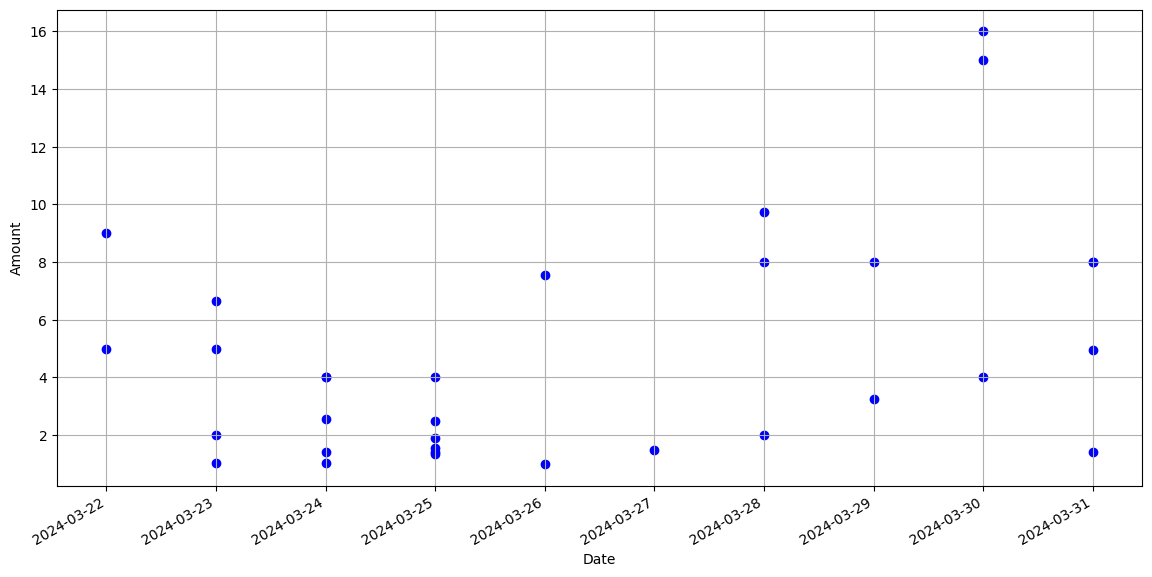

In [82]:
#let's visualize Everything!
from datetime import datetime
from matplotlib import pyplot as plt
plt.figure(figsize=(14, 7))

date_start = datetime.strptime("2024-03-22", "%Y-%m-%d")

date_end = datetime.strptime("2024-04-01","%Y-%m-%d")

data["Date"]
data_index = data[(data["Date"]>=date_start) & (data["Date"]<=date_end)]

 
plt_data = plt.scatter(data_index['Date'], data_index['Amount'], color='blue', marker='o')
 
# Setting the X and Y labels
plt_data = plt.xlabel('Date')
plt_data = plt.ylabel('Amount')



# Configuration of Graph
plt.gcf().autofmt_xdate()
plt.grid(True)

plt.show()

C:\Users\Emre Sevinç\AppData\Local\Temp\ipykernel_14024\1952633976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dinner['Date'] = pd.to_datetime(df_dinner['Date'])


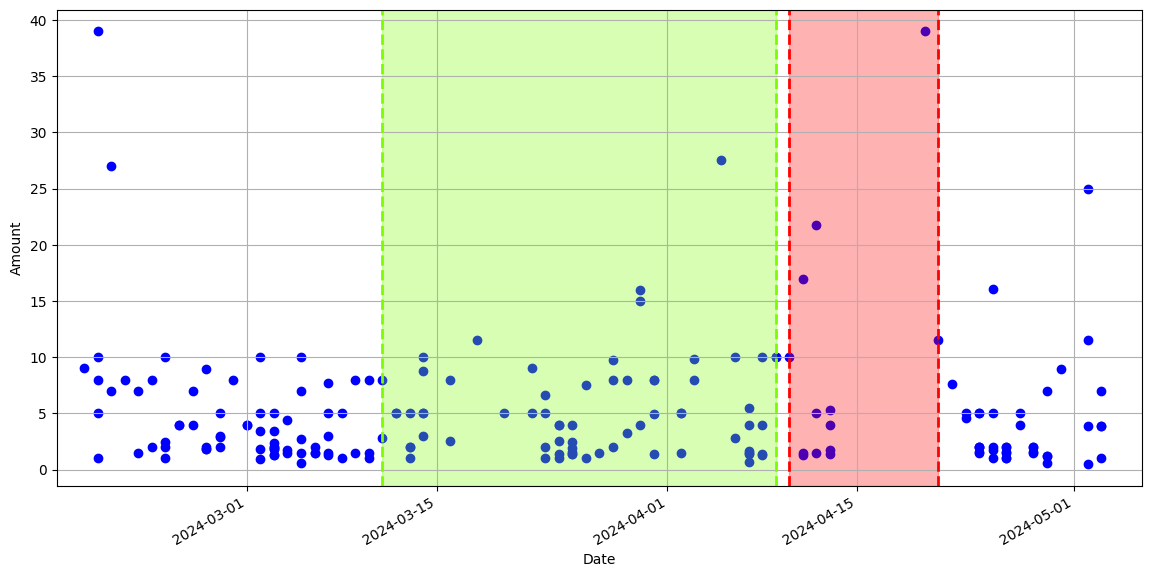

In [124]:
#let's visualize "Dinner"

from matplotlib import pyplot as plt
df_dinner = data
plt.figure(figsize=(14, 7))

df_dinner['Date'] = pd.to_datetime(df_dinner['Date'])
 
plt_dinner = plt.scatter(df_dinner['Date'], df_dinner['Amount'], color='blue', marker='o')
 
# Setting the X and Y labels
plt_dinner = plt.xlabel('Date')
plt_dinner = plt.ylabel('Amount')

# Add vertical lines for specific dates
ramadan_date = ['2024-03-11', '2024-04-9']
for date in ramadan_date:
    plt.axvline(pd.to_datetime(date), color='lawngreen', linestyle='--', linewidth=2)

midterm_date = ["2024-04-10","2024-04-21"]
for date in midterm_date:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=2)

# coloring ranges 
plt.axvspan(pd.to_datetime('2024-03-11'), pd.to_datetime('2024-04-09'), color='lawngreen', alpha=0.3)
plt.axvspan(pd.to_datetime('2024-04-10'), pd.to_datetime('2024-04-21'), color='red', alpha=0.3)

plt.xlim([pd.to_datetime("2024-02-16"), pd.to_datetime('2024-05-06')])
# Configuration of Graph
plt.gcf().autofmt_xdate()
plt.grid(True)

plt.show()

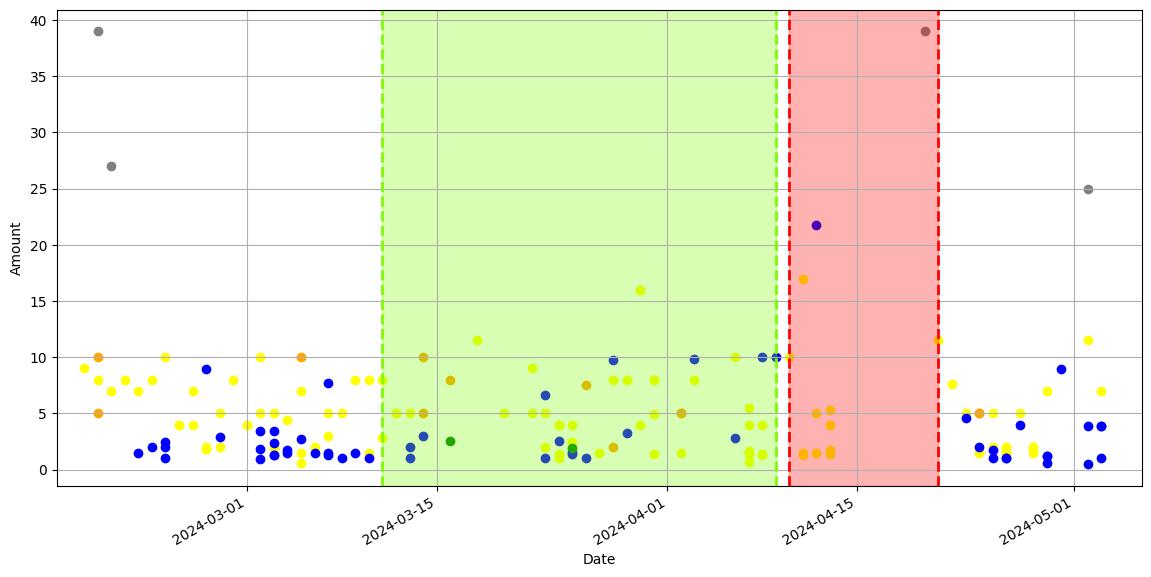

In [121]:
plt.figure(figsize=(14, 7))

df_cdinner = data[data["Category"]=="Dinner"]
df_homexp = data[data["Category"]=="Home Expenses"]
df_groc= data[data["Category"]=="Groceries"]
df_ent = data[data["Category"]=="Entertainment"]
df_pers = data[data["Category"]=="Personal Care"]
df_entertainment = data[data["Category"]=="Dinner"]


plt.scatter(df_cdinner['Date'], df_cdinner['Amount'], color='yellow', marker='o')
plt.scatter(df_homexp['Date'], df_homexp['Amount'], color='orange', marker='o')
plt.scatter(df_groc['Date'], df_groc['Amount'], color='blue', marker='o')
plt.scatter(df_ent['Date'], df_ent['Amount'], color='green', marker='o')
plt.scatter(df_pers['Date'], df_pers['Amount'], color='gray', marker='o')


plt_dinner = plt.xlabel('Date')
plt_dinner = plt.ylabel('Amount')

# Add vertical lines for specific dates
ramadan_date = ['2024-03-11', '2024-04-9']
for date in ramadan_date:
    plt.axvline(pd.to_datetime(date), color='lawngreen', linestyle='--', linewidth=2)

midterm_date = ["2024-04-10","2024-04-21"]
for date in midterm_date:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=2)
# coloring ranges 
plt.axvspan(pd.to_datetime('2024-03-11'), pd.to_datetime('2024-04-09'), color='lawngreen', alpha=0.3)
plt.axvspan(pd.to_datetime('2024-04-10'), pd.to_datetime('2024-04-21'), color='red', alpha=0.3)

plt.xlim([pd.to_datetime("2024-02-16"), pd.to_datetime('2024-05-06')])
# Configuration of Graph
plt.gcf().autofmt_xdate()
plt.grid(True)

plt.show()

In [125]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


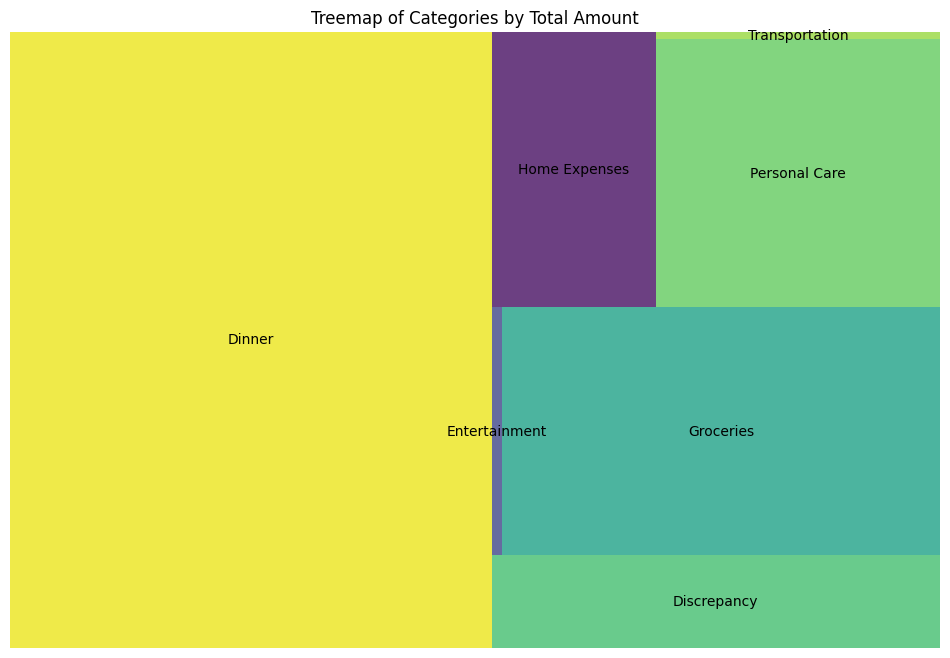

In [126]:
import squarify
import matplotlib.pyplot as plt

# Sample data for demonstration (assuming reg_data is available)

# Calculate total amount and entry size for each category
category_data = data.groupby('Category').agg({'Amount': 'sum', 'Date': 'count'}).reset_index()
category_data.columns = ['Category', 'Total Amount', 'Entry Size']

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=category_data['Total Amount'], label=category_data['Category'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Categories by Total Amount')
plt.show()

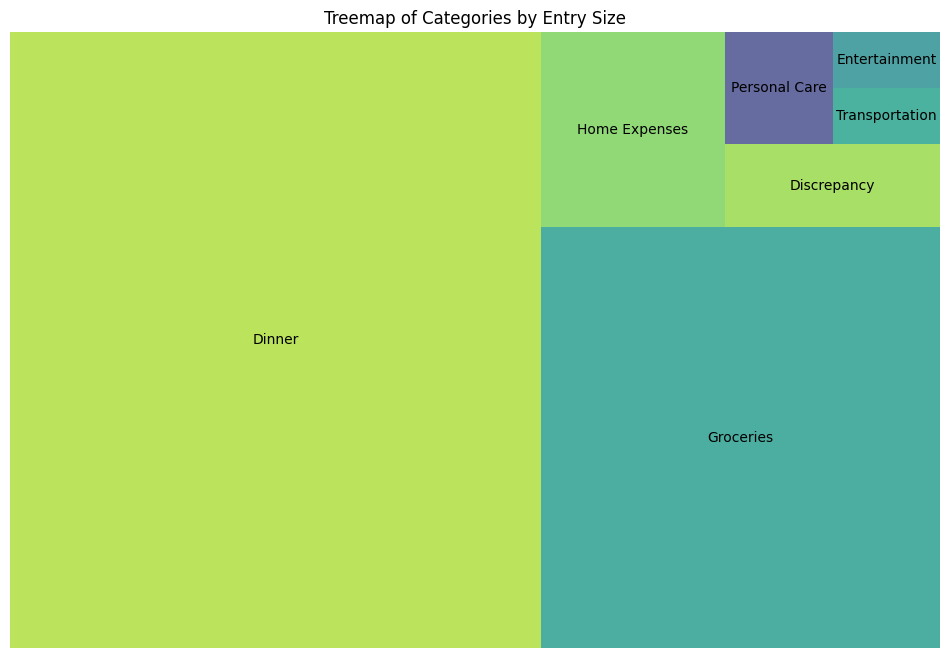

In [128]:

category_entry_size = data['Category'].value_counts().reset_index()
category_entry_size.columns = ['Category', 'Entry Size']

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=category_entry_size['Entry Size'], label=category_entry_size['Category'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Categories by Entry Size')
plt.show()

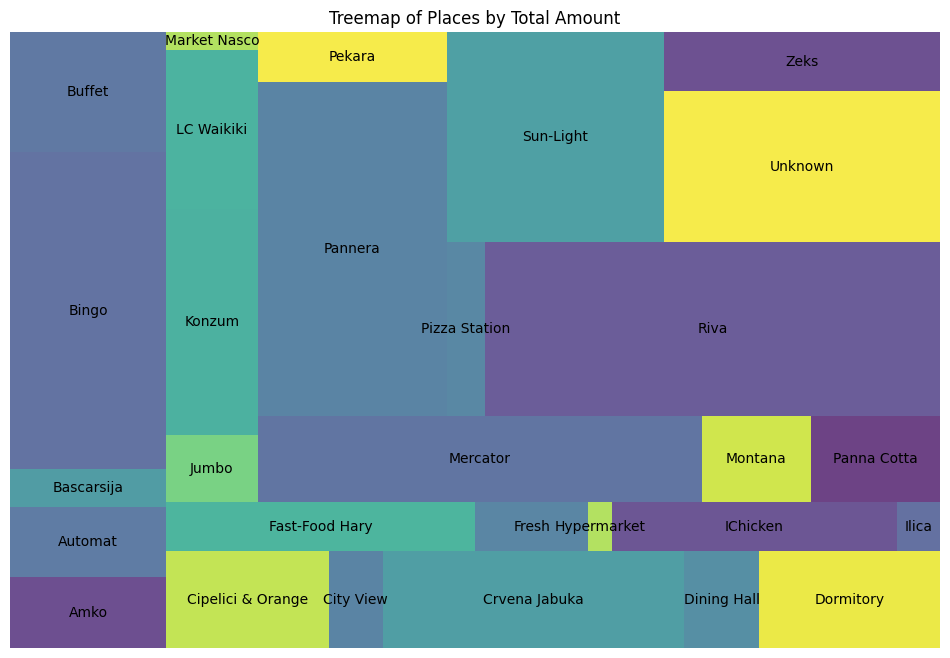

In [127]:
import squarify
import matplotlib.pyplot as plt

# Sample data for demonstration (assuming reg_data is available)

# Calculate total amount and entry size for each category
place_data = data.groupby('Place').agg({'Amount': 'sum', 'Date': 'count'}).reset_index()
place_data.columns = ['Place', 'Total Amount', 'Entry Size']

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=place_data['Total Amount'], label=place_data['Place'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Places by Total Amount')
plt.show()

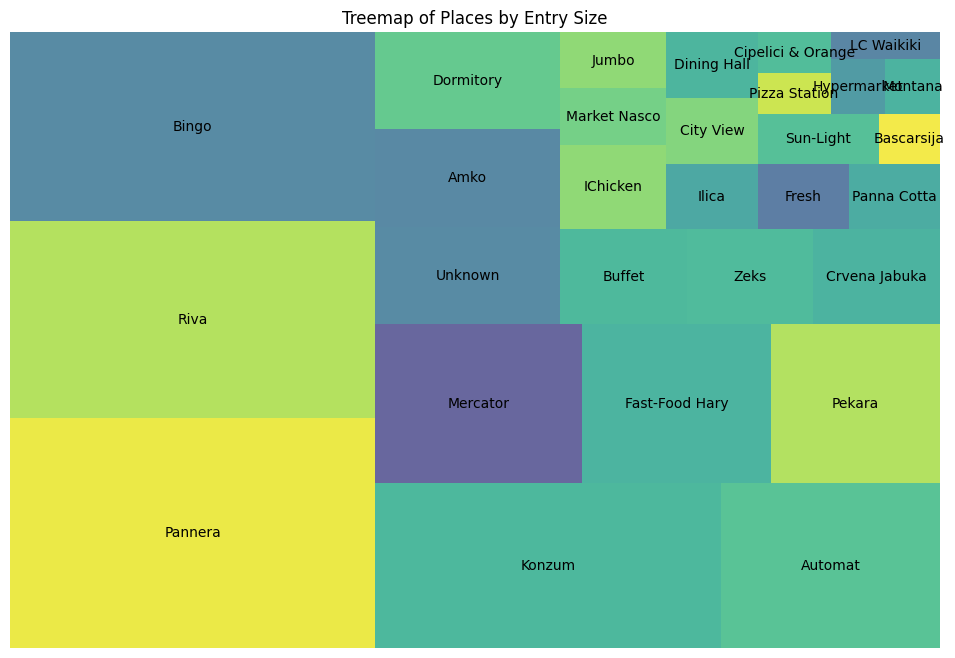

In [129]:
place_entry_size = data['Place'].value_counts().reset_index()
place_entry_size.columns = ['Place', 'Entry Size']

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=place_entry_size['Entry Size'], label=place_entry_size['Place'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Places by Entry Size')
plt.show()

In [85]:
# The date for between red lines, Midterm Exams
# The date for between green lines Ramadan Month

## Trying to find possible Regression Lines 

In [86]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(data, columns=["Place", "Description", "Category"])


In [87]:
# Define the target variable (Amount)
y = df_encoded["Amount"]

# Define the feature set (all columns except Amount)
X = df_encoded.drop(columns=["Amount", "Date"])  # Drop Amount and Date as Date isn't useful for a linear model directly


In [88]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [90]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.5140882952965354e+24
R-squared: -8.141365231262276e+22


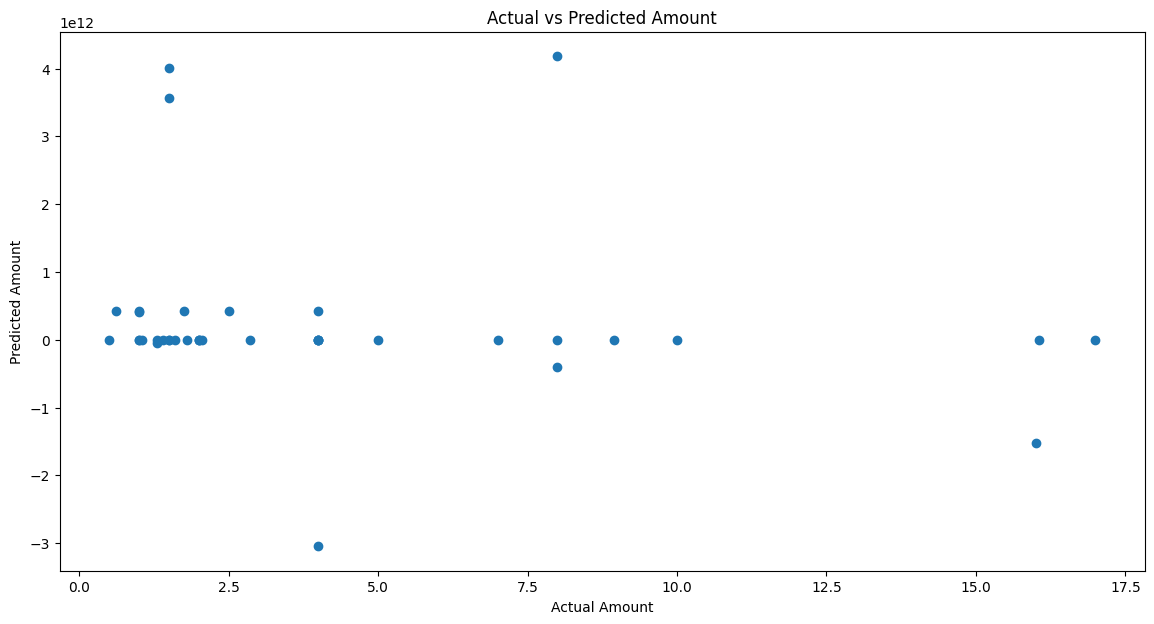

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# NO RELATIONS FOUND
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Amount")
plt.ylabel("Predicted Amount")
plt.title("Actual vs Predicted Amount")
plt.show()


## Continuing Visualization 

In [92]:
reg_data = data


# there is no need for income category.
reg_data = reg_data[reg_data["Category"]!="Income"]

reg_data["Day"] = reg_data["Date"].dt.day_name()
data_w_days = reg_data 
reg_data = reg_data[(reg_data["Place"] == "Bingo") | (reg_data["Place"] == "Riva" )]



reg_data

,Date,Place,Description,Category,Amount,Day
41,2024-03-02,Bingo,Water,Groceries,0.95,Saturday
62,2024-03-07,Riva,Hamburger,Dinner,5.00,Thursday
63,2024-03-07,Riva,Sensation,Dinner,3.00,Thursday
67,2024-03-08,Riva,Chicken Soup,Dinner,5.00,Friday
69,2024-03-09,Riva,Gulas,Dinner,8.00,Saturday
74,2024-03-11,Riva,Cüfte,Dinner,8.00,Monday
76,2024-03-12,Riva,Hamburger,Dinner,5.00,Tuesday
77,2024-03-12,Riva,Hamburger,Dinner,5.00,Tuesday
78,2024-03-13,Riva,Chicken Soup,Dinner,5.00,Wednesday
79,2024-03-13,Riva,Water,Dinner,2.00,Wednesday


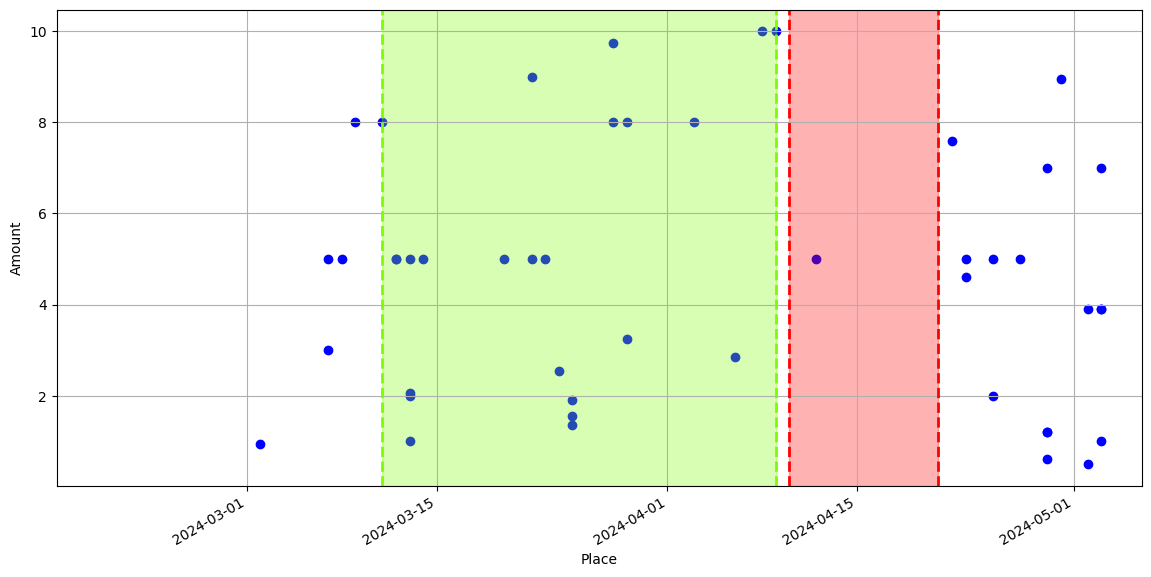

In [120]:
plt.figure(figsize=(14, 7))

plt_dinner = plt.scatter(reg_data['Date'], reg_data['Amount'], color='blue', marker='o')
 
# Setting the X and Y labels
plt.xlabel('Place')
plt.ylabel('Amount')

# Add vertical lines for specific dates
ramadan_date = ['2024-03-11', '2024-04-9']
for date in ramadan_date:
    plt.axvline(pd.to_datetime(date), color='lawngreen', linestyle='--', linewidth=2)

midterm_date = ["2024-04-10","2024-04-21"]
for date in midterm_date:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=2)

plt.xlim([pd.to_datetime("2024-02-16"), pd.to_datetime('2024-05-06')])
# coloring ranges 
plt.axvspan(pd.to_datetime('2024-03-11'), pd.to_datetime('2024-04-09'), color='lawngreen', alpha=0.3)
plt.axvspan(pd.to_datetime('2024-04-10'), pd.to_datetime('2024-04-21'), color='red', alpha=0.3)

plt.gcf().autofmt_xdate()
plt.grid(True)

plt.show()

In [94]:
data_w_days

,Date,Place,Description,Category,Amount,Day
1,2024-02-18,Panna Cotta,Polito Salad,Dinner,9.0,Sunday
2,2024-02-19,Dormitory,Laundry Ticket,Home Expenses,5.0,Monday
3,2024-02-19,Sun-Light,GYM Membership,Personal Care,39.0,Monday
4,2024-02-19,IChicken,Combo Menu,Dinner,8.0,Monday
5,2024-02-19,Buffet,SIM Card + 10GB,Home Expenses,10.0,Monday
...,...,...,...,...,...,...
202,2024-05-02,Bingo,Ice Cream,Groceries,0.5,Thursday
203,2024-05-03,Riva,Tuna Salate,Dinner,7.0,Friday
204,2024-05-03,Bingo,Pringles,Groceries,3.9,Friday
205,2024-05-03,Bingo,Grapes,Groceries,3.9,Friday


In [95]:
from datetime import datetime
table_day = pd.pivot_table(data_w_days, values=["Amount"], index=["Day"],aggfunc={'Amount': "sum"})
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
table_day = table_day.reindex(ordered_days)
#aggfunc={'Amount': "sum"}

table_day

,Amount
Day,
Monday,151.04
Tuesday,139.00
Wednesday,89.40
Thursday,173.05
Friday,129.95
Saturday,179.70
Sunday,117.25


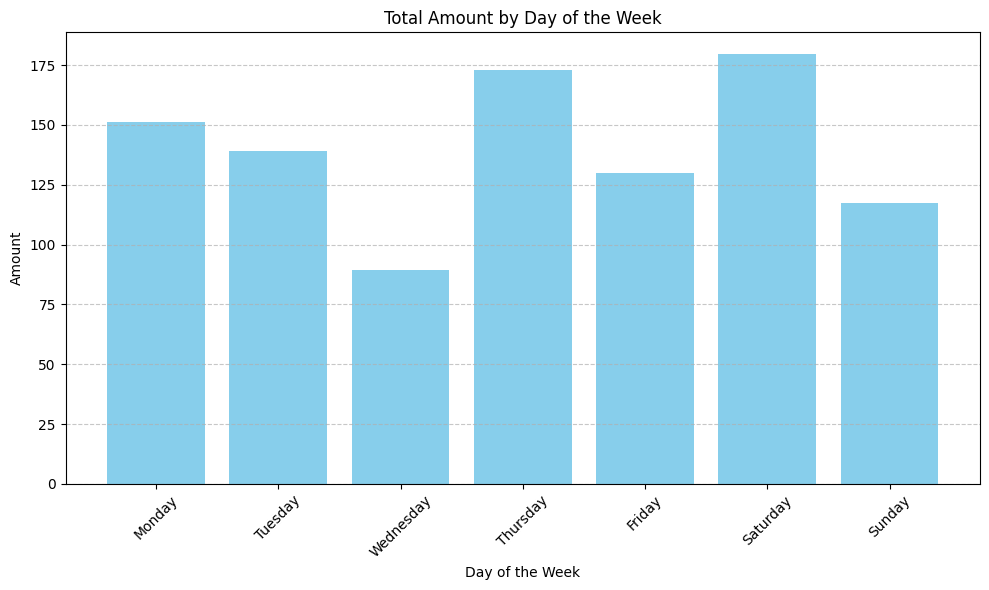

In [96]:
#visualizing it

plt.figure(figsize=(10, 6))
plt.bar(table_day.index, table_day['Amount'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.title('Total Amount by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [110]:
# Creating a date range from 2024-02-18 to 2024-05-03
date_range = pd.date_range(start='2024-02-18', end='2024-05-03')

# Finding the missing dates
existing_dates = data_w_days['Date'].unique()
missing_dates = date_range.difference(existing_dates)

missing_dates

DatetimeIndex(['2024-03-15', '2024-03-17', '2024-03-19', '2024-03-21',
               '2024-04-01', '2024-04-04', '2024-04-14', '2024-04-15',
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-05-01'],
              dtype='datetime64[ns]', freq=None)

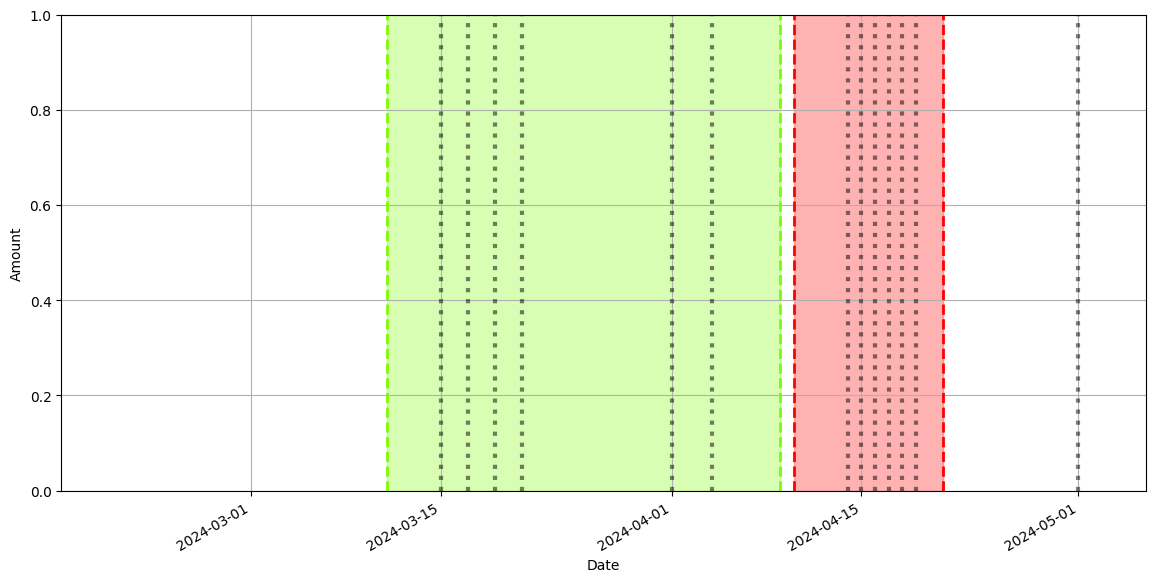

In [119]:
import numpy as np
missing_array = missing_dates.to_numpy()
plt.figure(figsize=(14, 7))

#plt.scatter(data_w_days['Date'], data_w_days['Amount'], color='blue', marker='o')
 
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Amount')


for missing_date in missing_array:
    plt.axvline(x=missing_date, color='black', linestyle=':', alpha=0.5,linewidth=3)

ramadan_date = ['2024-03-11', '2024-04-9']
for date in ramadan_date:
    plt.axvline(pd.to_datetime(date), color='lawngreen', linestyle='--', linewidth=2)

midterm_date = ["2024-04-10","2024-04-21"]
for date in midterm_date:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=2)

# coloring ranges 
plt.axvspan(pd.to_datetime('2024-03-11'), pd.to_datetime('2024-04-09'), color='lawngreen', alpha=0.3)
plt.axvspan(pd.to_datetime('2024-04-10'), pd.to_datetime('2024-04-21'), color='red', alpha=0.3)

plt.xlim([pd.to_datetime("2024-02-16"), pd.to_datetime('2024-05-06')])
# Configuration of Graph
plt.gcf().autofmt_xdate()
plt.grid(True)

plt.show()

## Now predicting the full spendings 

In [102]:
data_w_days

,Date,Place,Description,Category,Amount,Day
1,2024-02-18,Panna Cotta,Polito Salad,Dinner,9.0,Sunday
2,2024-02-19,Dormitory,Laundry Ticket,Home Expenses,5.0,Monday
3,2024-02-19,Sun-Light,GYM Membership,Personal Care,39.0,Monday
4,2024-02-19,IChicken,Combo Menu,Dinner,8.0,Monday
5,2024-02-19,Buffet,SIM Card + 10GB,Home Expenses,10.0,Monday
...,...,...,...,...,...,...
202,2024-05-02,Bingo,Ice Cream,Groceries,0.5,Thursday
203,2024-05-03,Riva,Tuna Salate,Dinner,7.0,Friday
204,2024-05-03,Bingo,Pringles,Groceries,3.9,Friday
205,2024-05-03,Bingo,Grapes,Groceries,3.9,Friday


In [103]:
# Function to calculate predicted amount based on the date range
def predict_total_amount_by_date_range(data, sample_size, total_days):
    sample_data = data.head(sample_size)
    days_in_sample = (sample_data['Date'].max() - sample_data['Date'].min()).days + 1
    average_daily_amount = sample_data['Amount'].sum() / days_in_sample
    predicted_total = average_daily_amount * total_days
    return predicted_total

# Sample sizes to test
sample_sizes = [10, 20, 30, 40, 50, 75, 100, 150, len(data_w_days)]

# Calculating the average daily spending for different sample sizes
average_daily_spending = [predict_total_amount_by_date_range(data_w_days, size,119) for size in sample_sizes]

# Creating a DataFrame for visualization
average_daily_spending_df = pd.DataFrame({
    'Sample Size': sample_sizes,
    'Full Spending Predictions': average_daily_spending
})


average_daily_spending_df


,Sample Size,Full Spending Predictions
0,10,2879.800000
1,20,2115.555556
2,30,2007.629167
3,40,1909.156667
4,50,1832.600000
5,75,1711.458000
6,100,1514.677027
7,150,1520.366667
8,191,1533.518553


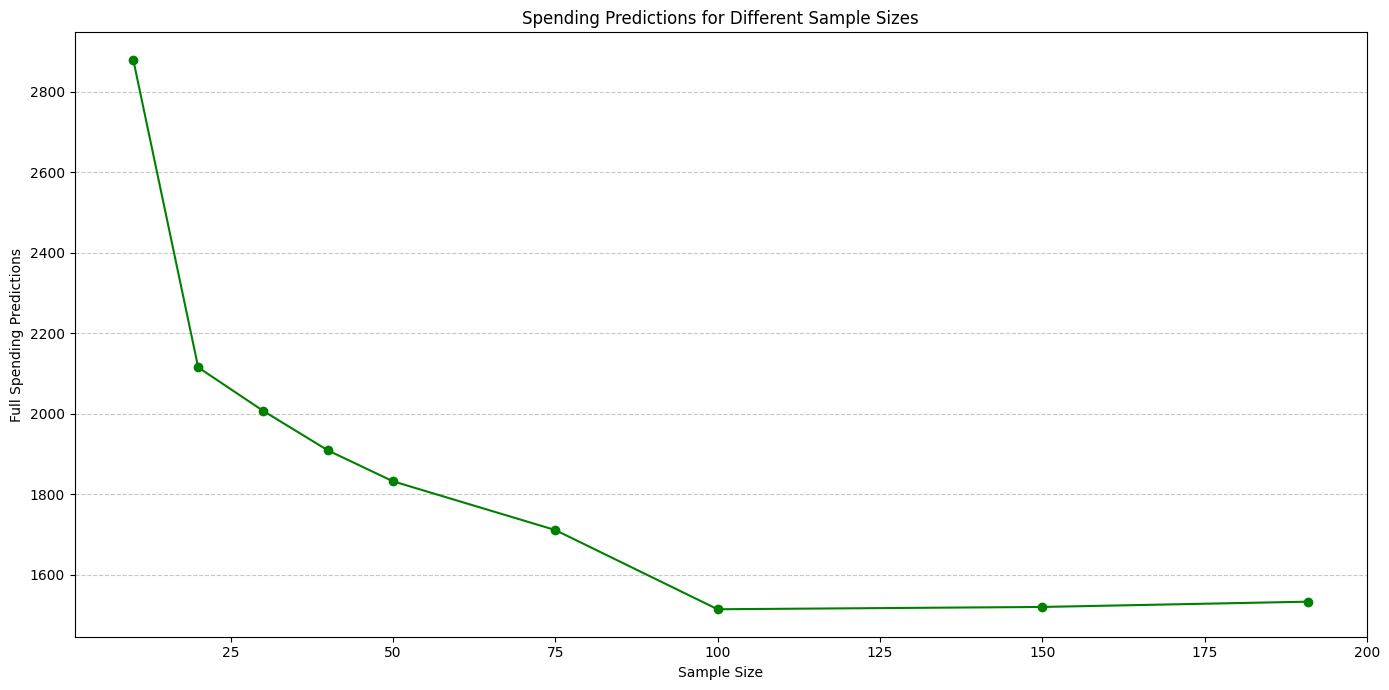

In [104]:
plt.figure(figsize=(14, 7))
plt.plot(average_daily_spending_df["Sample Size"], average_daily_spending_df["Full Spending Predictions"], marker="o", linestyle="-", color="green")
plt.xlabel("Sample Size")
plt.ylabel("Full Spending Predictions")
plt.title("Spending Predictions for Different Sample Sizes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [105]:
# Ensuring data is sorted by date)

def predict_total_amount(data, sample_size, total_days):
    sample_data = data.head(sample_size)
    average_daily_amount = sample_data["Amount"].sum() / sample_size
    predicted_total = average_daily_amount * total_days
    return predicted_total


prediction_10_days = predict_total_amount(data_w_days, 10, 119)
prediction_50_days = predict_total_amount(data_w_days, 50, 119)
prediction_100_days = predict_total_amount(data_w_days, 100, 119)
prediction_all_data = predict_total_amount(data_w_days, len(data_w_days), 119)

predictions = {
    'Sample Size': ['First 10 days', 'Next 50 days', 'Next 100 days', 'All data'],
    'Predicted Total for 119 Days': [prediction_10_days, prediction_50_days, prediction_100_days, prediction_all_data]
}

predictions_df = pd.DataFrame(predictions)

predictions_df

,Sample Size,Predicted Total for 119 Days
0,First 10 days,1439.900000
1,Next 50 days,623.084000
2,Next 100 days,560.430500
3,All data,610.195864


## Explaining basic descriptive statistics: Dispersion and Central Tendency

In [106]:
import numpy as np
import statistics

def my_describe(score):
    return {"count":[score.size],
            "std":[np.std(score)],
            "mean":[np.mean(score)],
            "min":[min(score)],
            "max":[max(score)],
            "mode":[statistics.mode(score)],
            "median":[statistics.median(score)]}




In [107]:
my_describe(df_dinner["Amount"])

{'count': [191],
 'std': [5.702286941966405],
 'mean': [5.127696335078533],
 'min': [0.5],
 'max': [39.0],
 'mode': [5.0],
 'median': [3.9]}

In [108]:
group_groceries = group_category.get_group("Groceries")
df_groceries = pd.DataFrame(group_groceries)

my_describe(df_groceries["Amount"])

{'count': [56],
 'std': [3.6502528873465234],
 'mean': [3.306964285714286],
 'min': [0.5],
 'max': [21.75],
 'mode': [1.0],
 'median': [1.925]}

In [109]:
df_23_05 = df.groupby('Date').sum()

df_23_05 = df_23_05.drop("Place",axis=1)
df_23_05 = df_23_05.drop("Description",axis=1)
df_23_05 = df_23_05.drop("Category",axis=1)
df_23_05

,Amount
Date,
2024-02-18,9.00
2024-02-19,63.00
2024-02-20,34.00
2024-02-21,8.00
2024-02-22,8.50
...,...
2024-04-28,7.10
2024-04-29,10.04
2024-04-30,8.95
